In [1]:
# schmema matching performed on TCp-DI dataset [20th March, 2025, Thursday]

In [2]:
# Load and Explore the data

In [3]:
import pandas as pd

# Load two datasets from the 'Unionable' category
df1 = pd.read_csv("Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_source.csv")
df2 = pd.read_csv("Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_target.csv")

# Display sample columns
print("Dataset 1 Columns:", df1.columns.tolist())
print("Dataset 2 Columns:", df2.columns.tolist())


Dataset 1 Columns: ['AgencyID', 'LastName', 'FirstName', 'MiddleInitial', 'Gender', 'AddressLine1', 'AddressLine2', 'PostalCode', 'City', 'State', 'Country', 'Phone', 'Income', 'NumberCars', 'NumberChildren', 'MaritalStatus', 'Age', 'CreditRating', 'OwnOrRentFlag', 'Employer', 'NumberCreditCards', 'NetWorth']
Dataset 2 Columns: ['prospect_AgencyID', 'prospect_LastName', 'prospect_FirstName', 'prospect_MiddleInitial', 'prospect_Gender', 'prospect_AddressLine1', 'prospect_AddressLine2', 'prospect_PostalCode', 'prospect_City', 'prospect_State', 'prospect_Country', 'prospect_Phone', 'prospect_Income', 'prospect_NumberCars', 'prospect_NumberChildren', 'prospect_MaritalStatus', 'prospect_Age', 'prospect_CreditRating', 'prospect_OwnOrRentFlag', 'prospect_Employer', 'prospect_NumberCreditCards', 'prospect_NetWorth']


In [13]:
# load the mapping for the actual mapping 

In [31]:
import json
import re

file_path = "Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_mapping.json"

# Read JSON file
with open(file_path, "r", encoding="utf-8") as file:
    raw_json = file.read()

# Remove invalid characters (like åç) using regex
clean_json = re.sub(r"[^\x00-\x7F]+", "", raw_json)  # Removes non-ASCII characters

# Fix trailing commas
clean_json = re.sub(r",\s*([\]}])", r"\1", clean_json)  

# Try to parse JSON again
try:
    mapping_data = json.loads(clean_json)
    print("JSON Fixed and Loaded Successfully!")
except json.JSONDecodeError as e:
    print(f"Still an error: {e}")

# Save the cleaned JSON back to a file
with open("fixed_mapping.json", "w", encoding="utf-8") as file:
    file.write(clean_json)
    print("Fixed JSON saved to 'fixed_mapping.json'")


JSON Fixed and Loaded Successfully!
Fixed JSON saved to 'fixed_mapping.json'


In [30]:
import json

# Define file paths
source_file = "Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_source.json"
target_file = "Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_target.json"
mapping_file = "Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_mapping.json"

def load_and_clean_json(file_path):
    """Loads and cleans a JSON file to remove invalid characters and trailing commas."""
    with open(file_path, "r", encoding="utf-8") as file:
        raw_json = file.read()

    # Remove invalid characters (like åç) using regex
    clean_json = re.sub(r"[^\x00-\x7F]+", "", raw_json)  

    # Fix trailing commas
    clean_json = re.sub(r",\s*([\]}])", r"\1", clean_json)  

    # Try to parse JSON again
    try:
        json_data = json.loads(clean_json)
        print(f"JSON Fixed and Loaded Successfully: {file_path}")
        return json_data
    except json.JSONDecodeError as e:
        print(f"JSON Error in {file_path}: {e}")
        return None

# Load cleaned JSON files
source_schema = load_and_clean_json(source_file)
target_schema = load_and_clean_json(target_file)
mapping_data = load_and_clean_json(mapping_file)

# Extract source and target column names
source_columns = list(source_schema.keys()) if source_schema else []
target_columns = list(target_schema.keys()) if target_schema else []

# Extract true mappings
true_mapping = {match["source_column"]: match["target_column"] for match in mapping_data["matches"]}

JSON Fixed and Loaded Successfully: Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_source.json
JSON Fixed and Loaded Successfully: Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_target.json
JSON Fixed and Loaded Successfully: Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_0_ac1_av/prospect_horizontal_0_ac1_av_mapping.json


In [22]:
import json

# Load the JSON file containing the correct schema mappings
with open("fixed_mapping.json", "r") as file:  # Replace with actual path
    mapping_data = json.load(file)

# Extract the list of matches
matches = mapping_data["matches"]

# Convert to a dictionary for easier lookup
true_mapping = {match["source_column"]: match["target_column"] for match in matches}

# Display extracted mapping
print("Ground-Truth Schema Mapping:\n", true_mapping)


Ground-Truth Schema Mapping:
 {'AgencyID': 'prospect_AgencyID', 'LastName': 'prospect_LastName', 'FirstName': 'prospect_FirstName', 'MiddleInitial': 'prospect_MiddleInitial', 'Gender': 'prospect_Gender', 'AddressLine1': 'prospect_AddressLine1', 'AddressLine2': 'prospect_AddressLine2', 'PostalCode': 'prospect_PostalCode', 'City': 'prospect_City', 'State': 'prospect_State', 'Country': 'prospect_Country', 'Phone': 'prospect_Phone', 'Income': 'prospect_Income', 'NumberCars': 'prospect_NumberCars', 'NumberChildren': 'prospect_NumberChildren', 'MaritalStatus': 'prospect_MaritalStatus', 'Age': 'prospect_Age', 'CreditRating': 'prospect_CreditRating', 'OwnOrRentFlag': 'prospect_OwnOrRentFlag', 'Employer': 'prospect_Employer', 'NumberCreditCards': 'prospect_NumberCreditCards', 'NetWorth': 'prospect_NetWorth'}


In [5]:
# Feature Extraction for Schema Matching

In [4]:
def extract_schema_features(df):
    schema_info = []
    for col in df.columns:
        schema_info.append({
            "column_name": col,
            "data_type": str(df[col].dtype),
            "num_unique_values": df[col].nunique(),
            "missing_values": df[col].isnull().sum(),
            "sample_values": df[col].dropna().unique()[:3]  # First 3 unique values
        })
    return pd.DataFrame(schema_info)

# Example: Extracting metadata from one dataset pair
schema_df1 = extract_schema_features(df1)
schema_df2 = extract_schema_features(df2)

print("Schema Features for Dataset 1:\n", schema_df1)
print("\nSchema Features for Dataset 2:\n", schema_df2)


Schema Features for Dataset 1:
           column_name data_type  num_unique_values  missing_values  \
0            AgencyID    object               7491               0   
1            LastName    object               7168               0   
2           FirstName    object               7030               0   
3       MiddleInitial    object                 52            4479   
4              Gender    object                 45            3952   
5        AddressLine1    object               5867             144   
6        AddressLine2    object               3033            4366   
7          PostalCode    object               6835             129   
8                City    object                272               0   
9               State    object                 61               0   
10            Country    object                  2             191   
11              Phone    object               7088             403   
12             Income   float64               7079        

In [6]:
# Compare with traditional methods

In [8]:
# Levenshtein matching

In [7]:
from fuzzywuzzy import fuzz

def levenshtein_match(source_col, target_cols):
    matches = {col: fuzz.ratio(source_col.lower(), col.lower()) for col in target_cols}
    return max(matches, key=matches.get)

# Example Usage
best_match = levenshtein_match("customer_id", df2.columns)
print(f"Levenshtein Best Match: {best_match}")


Levenshtein Best Match: prospect_NumberChildren


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [9]:
# BERT matching

In [12]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")

def bert_match(source_col, target_cols):
    source_emb = model.encode([source_col])
    target_embs = model.encode(target_cols)

    similarities = [np.dot(source_emb, target_emb) for target_emb in target_embs]
    return target_cols[np.argmax(similarities)]

# Example Usage
bert_best_match = bert_match("customer_id", df2.columns.tolist())
print(f"BERT Best Match: {bert_best_match}")


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BERT Best Match: prospect_AgencyID


In [11]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 456.6 kB/s eta 0:00:00a 0:00:01


In [16]:
# evaluating levenshtein on all the pairs using the mapping function

In [33]:
from fuzzywuzzy import fuzz

def levenshtein_match(source_col, target_cols):
    """Find the best matching target column using Levenshtein similarity."""
    matches = {col: fuzz.ratio(source_col.lower(), col.lower()) for col in target_cols}
    return max(matches, key=matches.get)  # Get the best match

# Generate predictions using Levenshtein
levenshtein_predictions = {col: levenshtein_match(col, target_columns) for col in source_columns}

# Display results
print("\nLevenshtein Predicted Mapping:")
for src_col, pred_col in levenshtein_predictions.items():
    print(f"{src_col} → {pred_col}")



Levenshtein Predicted Mapping:
AgencyID → prospect_AgencyID
LastName → prospect_LastName
FirstName → prospect_FirstName
MiddleInitial → prospect_MiddleInitial
Gender → prospect_Gender
AddressLine1 → prospect_AddressLine1
AddressLine2 → prospect_AddressLine2
PostalCode → prospect_PostalCode
City → prospect_City
State → prospect_State
Country → prospect_Country
Phone → prospect_Phone
Income → prospect_Income
NumberCars → prospect_NumberCars
NumberChildren → prospect_NumberChildren
MaritalStatus → prospect_MaritalStatus
Age → prospect_Age
CreditRating → prospect_CreditRating
OwnOrRentFlag → prospect_OwnOrRentFlag
Employer → prospect_Employer
NumberCreditCards → prospect_NumberCreditCards
NetWorth → prospect_NetWorth


In [25]:
# BERT based sematic matching

In [35]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load a pre-trained BERT model
model = SentenceTransformer("all-MiniLM-L6-v2")

def bert_match(source_col, target_cols):
    """Find the best matching target column using BERT embeddings."""
    source_emb = model.encode([source_col])
    target_embs = model.encode(target_cols)

    similarities = [np.dot(source_emb, target_emb) for target_emb in target_embs]
    return target_cols[np.argmax(similarities)]  # Get the best match

# Generate predictions using BERT
bert_predictions = {col: bert_match(col, target_columns) for col in source_columns}

# Display results
print("\nBERT Predicted Mapping:")
for src_col, pred_col in bert_predictions.items():
    print(f"{src_col} → {pred_col}")



BERT Predicted Mapping:
AgencyID → prospect_AgencyID
LastName → prospect_LastName
FirstName → prospect_FirstName
MiddleInitial → prospect_MiddleInitial
Gender → prospect_Gender
AddressLine1 → prospect_AddressLine1
AddressLine2 → prospect_AddressLine2
PostalCode → prospect_PostalCode
City → prospect_City
State → prospect_State
Country → prospect_Country
Phone → prospect_Phone
Income → prospect_Income
NumberCars → prospect_NumberCars
NumberChildren → prospect_NumberChildren
MaritalStatus → prospect_MaritalStatus
Age → prospect_Age
CreditRating → prospect_CreditRating
OwnOrRentFlag → prospect_OwnOrRentFlag
Employer → prospect_Employer
NumberCreditCards → prospect_NumberCreditCards
NetWorth → prospect_NetWorth


In [36]:
from sklearn.metrics import accuracy_score

# Convert ground truth and predictions to lists
true_values = [true_mapping.get(col, None) for col in source_columns]

# Compute accuracy for Levenshtein
levenshtein_values = [levenshtein_predictions.get(col, None) for col in source_columns]
levenshtein_accuracy = sum(1 for i in range(len(true_values)) if levenshtein_values[i] == true_values[i]) / len(true_values)

# Compute accuracy for BERT
bert_values = [bert_predictions.get(col, None) for col in source_columns]
bert_accuracy = sum(1 for i in range(len(true_values)) if bert_values[i] == true_values[i]) / len(true_values)

print(f"\nLevenshtein Accuracy: {levenshtein_accuracy * 100:.2f}%")
print(f"BERT Accuracy: {bert_accuracy * 100:.2f}%")



Levenshtein Accuracy: 100.00%
BERT Accuracy: 100.00%


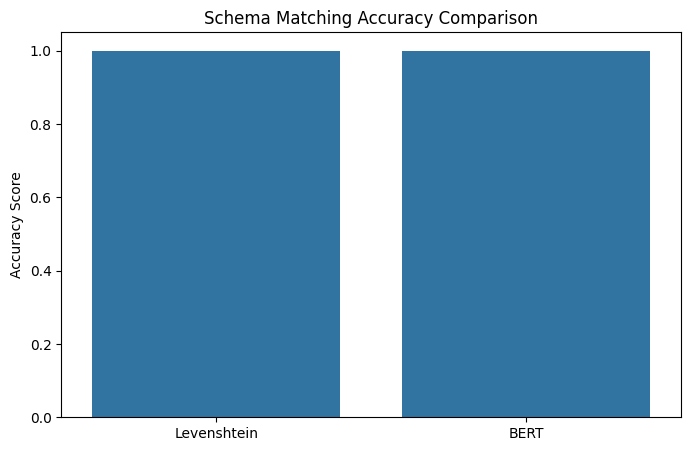

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

methods = ["Levenshtein", "BERT"]
accuracy_scores = [levenshtein_accuracy, bert_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=methods, y=accuracy_scores)
plt.title("Schema Matching Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()


In [38]:
# using another dataset to perform this

In [41]:
import json

# Define file paths
source_file = "Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_100_ac2_ev/prospect_horizontal_100_ac2_ev_source.json"
target_file = "Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_100_ac2_ev/prospect_horizontal_100_ac2_ev_target.json"
mapping_file = "Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_100_ac2_ev/prospect_horizontal_100_ac2_ev_mapping.json"

def load_and_clean_json(file_path):
    """Loads and cleans a JSON file to remove invalid characters and trailing commas."""
    with open(file_path, "r", encoding="utf-8") as file:
        raw_json = file.read()

    # Remove invalid characters (like åç) using regex
    clean_json = re.sub(r"[^\x00-\x7F]+", "", raw_json)  

    # Fix trailing commas
    clean_json = re.sub(r",\s*([\]}])", r"\1", clean_json)  

    # Try to parse JSON again
    try:
        json_data = json.loads(clean_json)
        print(f"JSON Fixed and Loaded Successfully: {file_path}")
        return json_data
    except json.JSONDecodeError as e:
        print(f"JSON Error in {file_path}: {e}")
        return None

# Load cleaned JSON files
source_schema = load_and_clean_json(source_file)
target_schema = load_and_clean_json(target_file)
mapping_data = load_and_clean_json(mapping_file)

# Extract source and target column names
source_columns = list(source_schema.keys()) if source_schema else []
target_columns = list(target_schema.keys()) if target_schema else []

# Extract true mappings
true_mapping = {match["source_column"]: match["target_column"] for match in mapping_data["matches"]}

JSON Fixed and Loaded Successfully: Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_100_ac2_ev/prospect_horizontal_100_ac2_ev_source.json
JSON Fixed and Loaded Successfully: Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_100_ac2_ev/prospect_horizontal_100_ac2_ev_target.json
JSON Fixed and Loaded Successfully: Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_100_ac2_ev/prospect_horizontal_100_ac2_ev_mapping.json


In [42]:
from fuzzywuzzy import fuzz

def levenshtein_match(source_col, target_cols):
    """Find the best matching target column using Levenshtein similarity."""
    matches = {col: fuzz.ratio(source_col.lower(), col.lower()) for col in target_cols}
    return max(matches, key=matches.get)  # Get the best match

# Generate predictions using Levenshtein
levenshtein_predictions = {col: levenshtein_match(col, target_columns) for col in source_columns}

# Display results
print("\nLevenshtein Predicted Mapping:")
for src_col, pred_col in levenshtein_predictions.items():
    print(f"{src_col} → {pred_col}")



Levenshtein Predicted Mapping:
AgencyID → AgeID
LastName → LaNa
FirstName → FirNa
MiddleInitial → MidInit
Gender → Gen
AddressLine1 → AdL1
AddressLine2 → AdLi2
PostalCode → PoC
City → NuChi
State → Sta
Country → Coun
Phone → Pho
Income → Inc
NumberCars → NumCrCar
NumberChildren → NumCrCar
MaritalStatus → MariSt
Age → Ag
CreditRating → CreRa
OwnOrRentFlag → OOReF
Employer → NeWor
NumberCreditCards → NumCrCar
NetWorth → NeWor


In [46]:
# using off the sheld BERT model [to research: why did it give this output, working mechanism behind this architecture into getting into this output]

In [43]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load a pre-trained BERT model
model = SentenceTransformer("all-MiniLM-L6-v2")

def bert_match(source_col, target_cols):
    """Find the best matching target column using BERT embeddings."""
    source_emb = model.encode([source_col])
    target_embs = model.encode(target_cols)

    similarities = [np.dot(source_emb, target_emb) for target_emb in target_embs]
    return target_cols[np.argmax(similarities)]  # Get the best match

# Generate predictions using BERT
bert_predictions = {col: bert_match(col, target_columns) for col in source_columns}

# Display results
print("\nBERT Predicted Mapping:")
for src_col, pred_col in bert_predictions.items():
    print(f"{src_col} → {pred_col}")



BERT Predicted Mapping:
AgencyID → AgeID
LastName → FirNa
FirstName → FirNa
MiddleInitial → Ag
Gender → AgeID
AddressLine1 → AdL1
AddressLine2 → AdLi2
PostalCode → PoC
City → C
State → Inc
Country → Inc
Phone → Em
Income → Inc
NumberCars → NumCrCar
NumberChildren → AgeID
MaritalStatus → MariSt
Age → AgeID
CreditRating → MariSt
OwnOrRentFlag → NeWor
Employer → Inc
NumberCreditCards → NumCrCar
NetWorth → NumCrCar


In [44]:
from sklearn.metrics import accuracy_score

# Convert ground truth and predictions to lists
true_values = [true_mapping.get(col, None) for col in source_columns]

# Compute accuracy for Levenshtein
levenshtein_values = [levenshtein_predictions.get(col, None) for col in source_columns]
levenshtein_accuracy = sum(1 for i in range(len(true_values)) if levenshtein_values[i] == true_values[i]) / len(true_values)

# Compute accuracy for BERT
bert_values = [bert_predictions.get(col, None) for col in source_columns]
bert_accuracy = sum(1 for i in range(len(true_values)) if bert_values[i] == true_values[i]) / len(true_values)

print(f"\nLevenshtein Accuracy: {levenshtein_accuracy * 100:.2f}%")
print(f"BERT Accuracy: {bert_accuracy * 100:.2f}%")



Levenshtein Accuracy: 81.82%
BERT Accuracy: 40.91%


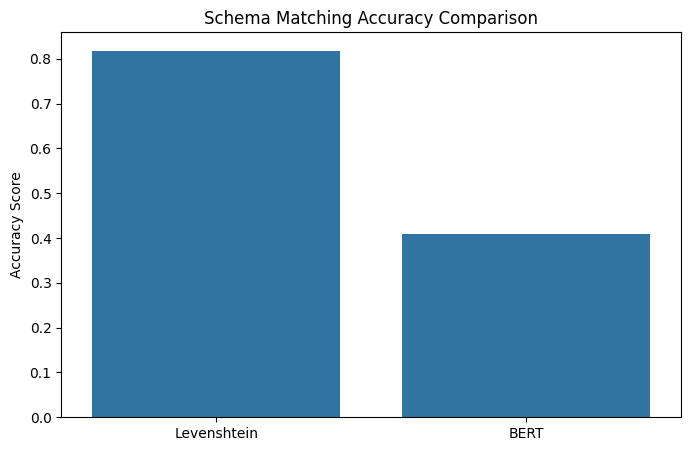

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

methods = ["Levenshtein", "BERT"]
accuracy_scores = [levenshtein_accuracy, bert_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=methods, y=accuracy_scores)
plt.title("Schema Matching Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()


In [47]:
## perform this benchmarking on all the dataset of TPC-DI dataset

In [48]:
import os
import json
import re

# Define the base directory containing TPC-DI datasets
base_dir = "Valentine-datasets/TPC-DI"

# Dictionary to store dataset paths
dataset_files = {}

# Traverse directory structure
for root, dirs, files in os.walk(base_dir):
    source_file = None
    target_file = None
    mapping_file = None

    for file in files:
        if file.endswith("_source.json"):
            source_file = os.path.join(root, file)
        elif file.endswith("_target.json"):
            target_file = os.path.join(root, file)
        elif file.endswith("_mapping.json"):
            mapping_file = os.path.join(root, file)

    # Ensure all three required files are present
    if source_file and target_file and mapping_file:
        dataset_files[root] = {
            "source": source_file,
            "target": target_file,
            "mapping": mapping_file
        }

# Display collected datasets
print(f"Found {len(dataset_files)} dataset pairs in TPC-DI:")
for dataset, paths in dataset_files.items():
    print(f"{dataset}:")
    print(f"  - Source: {paths['source']}")
    print(f"  - Target: {paths['target']}")
    print(f"  - Mapping: {paths['mapping']}")


Found 180 dataset pairs in TPC-DI:
Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_50_ac3_av:
  - Source: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_50_ac3_av/prospect_both_0_50_ac3_av_source.json
  - Target: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_50_ac3_av/prospect_both_0_50_ac3_av_target.json
  - Mapping: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_50_ac3_av/prospect_both_0_50_ac3_av_mapping.json
Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_30_ac1_ev:
  - Source: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_30_ac1_ev/prospect_both_0_30_ac1_ev_source.json
  - Target: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_30_ac1_ev/prospect_both_0_30_ac1_ev_target.json
  - Mapping: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_30_ac1_ev/prospect_both_0_30_ac1_ev_mapping.json
Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_70_ac3_ev:
  - Source: Valentine-datasets/TPC-DI/View-Unionable/pr

In [49]:
def load_and_clean_json(file_path):
    """Loads and cleans a JSON file to remove invalid characters and trailing commas."""
    with open(file_path, "r", encoding="utf-8") as file:
        raw_json = file.read()

    # Remove invalid characters
    clean_json = re.sub(r"[^\x00-\x7F]+", "", raw_json)

    # Fix trailing commas
    clean_json = re.sub(r",\s*([\]}])", r"\1", clean_json)

    # Try to parse JSON
    try:
        json_data = json.loads(clean_json)
        return json_data
    except json.JSONDecodeError as e:
        print(f"JSON Error in {file_path}: {e}")
        return None


In [50]:
from fuzzywuzzy import fuzz
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics import accuracy_score

# Load BERT model once
bert_model = SentenceTransformer("all-MiniLM-L6-v2")

def levenshtein_match(source_col, target_cols):
    """Find the best matching target column using Levenshtein similarity."""
    matches = {col: fuzz.ratio(source_col.lower(), col.lower()) for col in target_cols}
    return max(matches, key=matches.get)

def bert_match(source_col, target_cols):
    """Find the best matching target column using BERT embeddings."""
    source_emb = bert_model.encode([source_col])
    target_embs = bert_model.encode(target_cols)
    similarities = [np.dot(source_emb, target_emb) for target_emb in target_embs]
    return target_cols[np.argmax(similarities)]


In [51]:
# Store accuracy results
accuracy_results = []

for dataset, paths in dataset_files.items():
    print(f"\nProcessing dataset: {dataset}")

    # Load and clean JSON files
    source_schema = load_and_clean_json(paths["source"])
    target_schema = load_and_clean_json(paths["target"])
    mapping_data = load_and_clean_json(paths["mapping"])

    # Ensure valid JSON data
    if not source_schema or not target_schema or not mapping_data:
        print(f"Skipping dataset {dataset} due to JSON issues.")
        continue

    # Extract column names
    source_columns = list(source_schema.keys())
    target_columns = list(target_schema.keys())

    # Extract ground truth mappings
    true_mapping = {match["source_column"]: match["target_column"] for match in mapping_data["matches"]}

    # Compute Levenshtein predictions
    levenshtein_predictions = {col: levenshtein_match(col, target_columns) for col in source_columns}

    # Compute BERT predictions
    bert_predictions = {col: bert_match(col, target_columns) for col in source_columns}

    # Compute accuracy
    true_values = [true_mapping.get(col, None) for col in source_columns]
    levenshtein_values = [levenshtein_predictions.get(col, None) for col in source_columns]
    bert_values = [bert_predictions.get(col, None) for col in source_columns]

    levenshtein_accuracy = sum(1 for i in range(len(true_values)) if levenshtein_values[i] == true_values[i]) / len(true_values)
    bert_accuracy = sum(1 for i in range(len(true_values)) if bert_values[i] == true_values[i]) / len(true_values)

    # Store accuracy results
    accuracy_results.append({
        "dataset": dataset,
        "levenshtein_accuracy": levenshtein_accuracy,
        "bert_accuracy": bert_accuracy
    })

    print(f"Levenshtein Accuracy: {levenshtein_accuracy * 100:.2f}%")
    print(f"BERT Accuracy: {bert_accuracy * 100:.2f}%")



🔍 Processing dataset: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_50_ac3_av
Levenshtein Accuracy: 68.75%
BERT Accuracy: 25.00%

🔍 Processing dataset: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_30_ac1_ev
Levenshtein Accuracy: 42.86%
BERT Accuracy: 42.86%

🔍 Processing dataset: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_70_ac3_ev
Levenshtein Accuracy: 83.33%
BERT Accuracy: 16.67%

🔍 Processing dataset: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_1_ac3_ev
Levenshtein Accuracy: 9.09%
BERT Accuracy: 9.09%

🔍 Processing dataset: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_30_ac5_ev
Levenshtein Accuracy: 42.86%
BERT Accuracy: 7.14%

🔍 Processing dataset: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_70_ac2_ev
Levenshtein Accuracy: 72.22%
BERT Accuracy: 38.89%

🔍 Processing dataset: Valentine-datasets/TPC-DI/View-Unionable/prospect_both_0_1_ac2_ev
Levenshtein Accuracy: 9.09%
BERT Accuracy: 9.09%

🔍 Processing datase


Accuracy results saved to 'schema_matching_accuracy.csv'.


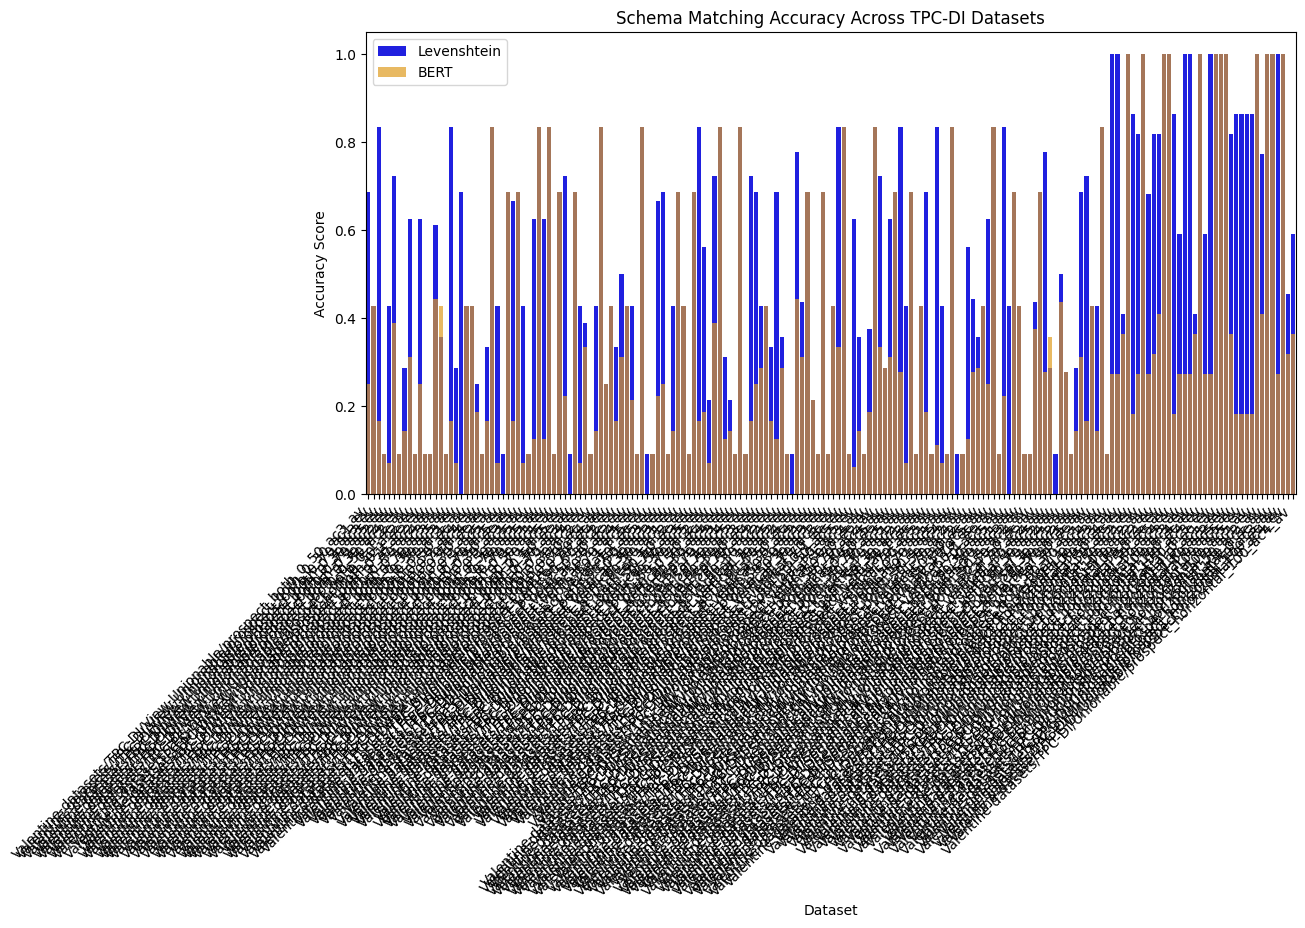

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame
df_results = pd.DataFrame(accuracy_results)

# Save accuracy results
df_results.to_csv("schema_matching_accuracy.csv", index=False)
print("\nAccuracy results saved to 'schema_matching_accuracy.csv'.")

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="dataset", y="levenshtein_accuracy", data=df_results, color="blue", label="Levenshtein")
sns.barplot(x="dataset", y="bert_accuracy", data=df_results, color="orange", label="BERT", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.title("Schema Matching Accuracy Across TPC-DI Datasets")
plt.ylabel("Accuracy Score")
plt.xlabel("Dataset")
plt.legend()
plt.show()


In [53]:
# March 22 saturday

In [58]:
# !pip install lightgbm

In [69]:
import os
import json
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz
import lightgbm as lgb
import matplotlib.pyplot as plt
import streamlit as st

In [68]:
!pip install lightgbm --no-dependencies

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)


In [62]:
def clean_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        raw = f.read()
    clean = re.sub(r"[^\x00-\x7F]+", "", raw)
    clean = re.sub(r",\s*([\]}])", r"\1", clean)
    return json.loads(clean)

def load_tpcdi_schema_pair(dataset_path):
    files = os.listdir(dataset_path)
    src = [f for f in files if f.endswith("_source.json")][0]
    tgt = [f for f in files if f.endswith("_target.json")][0]
    mapping = [f for f in files if f.endswith("_mapping.json")][0]

    source_json = clean_json(os.path.join(dataset_path, src))
    target_json = clean_json(os.path.join(dataset_path, tgt))
    mapping_json = clean_json(os.path.join(dataset_path, mapping))

    source_cols = list(source_json.keys())
    target_cols = list(target_json.keys())
    mapping_dict = {m["source_column"]: m["target_column"] for m in mapping_json["matches"]}

    return source_cols, target_cols, mapping_dict

In [70]:
def load_tpcdi_schema_pair(dataset_path):
    files = os.listdir(dataset_path)
    src = [f for f in files if f.endswith("_source.json")][0]
    tgt = [f for f in files if f.endswith("_target.json")][0]
    mapping = [f for f in files if f.endswith("_mapping.json")][0]

    source_json = clean_json(os.path.join(dataset_path, src))
    target_json = clean_json(os.path.join(dataset_path, tgt))
    mapping_json = clean_json(os.path.join(dataset_path, mapping))

    source_cols = list(source_json.keys())
    target_cols = list(target_json.keys())
    mapping_dict = {m["source_column"]: m["target_column"] for m in mapping_json["matches"]}

    return source_cols, target_cols, mapping_dict

In [71]:
def similarity_features(src, tgt):
    tfidf = TfidfVectorizer().fit([src, tgt])
    tfidf_sim = cosine_similarity(tfidf.transform([src]), tfidf.transform([tgt]))[0][0]
    return {
        "levenshtein": fuzz.ratio(src, tgt) / 100,
        "partial_ratio": fuzz.partial_ratio(src, tgt) / 100,
        "token_set": fuzz.token_set_ratio(src, tgt) / 100,
        "tfidf": tfidf_sim
    }

def create_training_data(source_cols, target_cols, mapping):
    data = []
    for src in source_cols:
        for tgt in target_cols:
            feats = similarity_features(src, tgt)
            feats["src"] = src
            feats["tgt"] = tgt
            feats["label"] = 1 if mapping.get(src) == tgt else 0
            data.append(feats)
    return data


In [72]:
def train_model_lgbm(data):
    df = pd.DataFrame(data)
    X = df[["levenshtein", "partial_ratio", "token_set", "tfidf"]]
    y = df["label"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

    model = lgb.LGBMClassifier()
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    print("\nLGBM Model Performance:")
    print(classification_report(y_test, preds))
    return model, df

def rank_predictions(model, source_cols, target_cols):
    ranked = {}
    for src in source_cols:
        candidates = []
        for tgt in target_cols:
            feats = similarity_features(src, tgt)
            X = pd.DataFrame([feats])
            prob = model.predict_proba(X)[0][1]
            candidates.append((tgt, prob))
        candidates.sort(key=lambda x: x[1], reverse=True)
        ranked[src] = candidates
    return ranked

In [73]:
def evaluate_rankings(ranked_preds, true_mapping, top_k=3, return_scores=False):
    top1_correct = 0
    topk_covered = 0

    for src, ranked in ranked_preds.items():
        top_preds = [t[0] for t in ranked[:top_k]]
        true = true_mapping.get(src)
        if true in top_preds:
            topk_covered += 1
            if top_preds[0] == true:
                top1_correct += 1

    total = len(true_mapping)
    top1 = top1_correct / total
    topk = topk_covered / total

    print(f"Top-1 Accuracy: {top1:.2%}")
    print(f"Top-{top_k} Coverage: {topk:.2%}")
    return (top1, topk) if return_scores else None

def log_false_positives(model, df, threshold=0.8):
    X = df[["levenshtein", "partial_ratio", "token_set", "tfidf"]]
    df["proba"] = model.predict_proba(X)[:, 1]
    df["pred"] = model.predict(X)
    fp = df[(df["label"] == 0) & (df["pred"] == 1) & (df["proba"] > threshold)]
    fp[["src", "tgt", "proba"]].to_csv("false_positives.csv", index=False)
    print(f"False positives saved: {len(fp)}")

def visualize_ranking_for_column(ranked_preds, source_col):
    top_matches = ranked_preds[source_col][:5]
    labels = [m[0] for m in top_matches]
    scores = [m[1] for m in top_matches]

    plt.figure(figsize=(8, 4))
    plt.barh(labels[::-1], scores[::-1])
    plt.title(f"Top Matches for '{source_col}'")
    plt.xlabel("Match Confidence")
    plt.tight_layout()
    plt.show()

In [74]:
def run_all_tpcdi(base_dir="Valentine-datasets/TPC-DI"):
    results = []
    for root, dirs, files in os.walk(base_dir):
        if not any(f.endswith("_mapping.json") for f in files):
            continue
        try:
            source_cols, target_cols, true_mapping = load_tpcdi_schema_pair(root)
            train_data = create_training_data(source_cols, target_cols, true_mapping)
            model, df = train_model_lgbm(train_data)
            ranked_preds = rank_predictions(model, source_cols, target_cols)
            top1, top3 = evaluate_rankings(ranked_preds, true_mapping, return_scores=True)
            results.append({"dataset": root, "top1": top1, "top3": top3})
            log_false_positives(model, df)
        except Exception as e:
            print(f"Failed on {root}: {e}")

    pd.DataFrame(results).to_csv("tpcdi_results.csv", index=False)

In [75]:
def run_streamlit_ui():
    st.title("Schema Matching Explorer")
    df = pd.read_csv("false_positives.csv")
    st.write("## False Positive Matches")
    st.dataframe(df)

In [76]:
run_all_tpcdi()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[LightGBM] [Info] Number of positive: 8, number of negative: 196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 204, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039216 -> initscore=-3.198673
[LightGBM] [Info] Start training from score -3.198673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Top-1 Accuracy: 100.00%
Top-3 Coverage: 100.00%
False positives saved: 0
[LightGBM] [Info] Number of positive: 11, number of negative: 245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 256, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042969 -> initscore=-3.103363
[LightGBM] [Info] Start training from score -3.103363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Top-1 Accuracy: 100.00%
Top-3 Coverage: 100.00%
False positives saved: 0
[LightGBM] [Info] Number of positive: 5, number of negative: 142
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 147, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034014 -> initscore=-3.346389
[LightGBM] [Info] Start training from score -3.346389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Top-1 Accuracy: 83.33%
Top-3 Coverage: 100.00%
False positives saved: 0
[LightGBM] [Info] Number of positive: 8, number of negative: 196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 204, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039216 -> initscore=-3.198673
[LightGBM] [Info] Start training from score -3.198673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Top-1 Accuracy: 100.00%
Top-3 Coverage: 100.00%
False positives saved: 0
[LightGBM] [Info] Number of positive: 8, number of negative: 196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 204, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039216 -> initscore=-3.198673
[LightGBM] [Info] Start training from score -3.198673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [77]:
run_streamlit_ui()

2025-03-22 18:10:47.863 
  command:

    streamlit run /opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [80]:
# !streamlit run /opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/ipykernel_launcher.py

In [81]:
import pandas as pd

df = pd.read_csv("tpcdi_results.csv")
print(df.describe())


             top1        top3
count  144.000000  144.000000
mean     0.971928    0.996380
std      0.050954    0.015782
min      0.800000    0.909091
25%      0.954545    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [83]:
# import matplotlib.pyplot as plt

# df.sort_values("top1", inplace=True)

# plt.figure(figsize=(12, 6))
# plt.barh(df["dataset"], df["top1"], color="skyblue")
# plt.title("Top-1 Accuracy per TPC-DI Dataset")
# plt.xlabel("Top-1 Accuracy")
# plt.tight_layout()
# plt.show()


In [85]:
# df.plot(x="dataset", y=["top1", "top3"], kind="bar", figsize=(14, 6))
# plt.title("Top-1 vs Top-3 Coverage")
# plt.ylabel("Accuracy")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()


In [86]:
print("Average Top-1 Accuracy:", df["top1"].mean())
print("Average Top-3 Coverage:", df["top3"].mean())

print("Best Dataset:", df.loc[df['top1'].idxmax()]["dataset"])
print("Worst Dataset:", df.loc[df['top1'].idxmin()]["dataset"])


Average Top-1 Accuracy: 0.9719276094276093
Average Top-3 Coverage: 0.9963804713804715
Best Dataset: Valentine-datasets/TPC-DI/Unionable/prospect_horizontal_50_ac1_ev
Worst Dataset: Valentine-datasets/TPC-DI/Semantically-Joinable/prospect_both_50_70_ac2_av


In [88]:
# fp = pd.read_csv("false_positives.csv")
# print(fp.sample(5))

# # Most common false matches
# print(fp["tgt"].value_counts().head())


In [89]:
summary = {
    "datasets_evaluated": len(df),
    "avg_top1_accuracy": df["top1"].mean(),
    "avg_top3_coverage": df["top3"].mean(),
    "datasets_below_70%": df[df["top1"] < 0.7].shape[0],
    "most_challenging_dataset": df.loc[df['top1'].idxmin()]["dataset"]
}
pd.Series(summary)


datasets_evaluated                                                        144
avg_top1_accuracy                                                    0.971928
avg_top3_coverage                                                     0.99638
datasets_below_70%                                                          0
most_challenging_dataset    Valentine-datasets/TPC-DI/Semantically-Joinabl...
dtype: object

In [90]:
df.loc[df['top1'].idxmin()]["dataset"]

'Valentine-datasets/TPC-DI/Semantically-Joinable/prospect_both_50_70_ac2_av'

In [92]:
# # streamlit_app.py

# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load evaluation results
# @st.cache_data
# def load_results():
#     return pd.read_csv("tpcdi_results.csv")

# st.set_page_config(page_title="TPC-DI Schema Matching Results", layout="wide")

# st.title("TPC-DI Schema Matching Evaluation Dashboard")

# df = load_results()

# # Sidebar filters
# min_acc = st.sidebar.slider("Minimum Top-1 Accuracy", 0.0, 1.0, 0.0, 0.05)
# show_low_perf = st.sidebar.checkbox("Only show low-performing datasets (< 0.7 accuracy)", False)

# # Filtered DataFrame
# filtered = df[df["top1"] >= min_acc] if not show_low_perf else df[df["top1"] < 0.7]

# # Key metrics
# col1, col2, col3 = st.columns(3)
# col1.metric("Avg. Top-1 Accuracy", f"{df['top1'].mean():.2%}")
# col2.metric("Avg. Top-3 Coverage", f"{df['top3'].mean():.2%}")
# col3.metric("Datasets Evaluated", len(df))

# st.markdown("---")

# # Bar Chart
# st.subheader("Top-1 Accuracy by Dataset")
# fig, ax = plt.subplots(figsize=(12, 6))
# plot_data = filtered.sort_values("top1")
# ax.barh(plot_data["dataset"], plot_data["top1"], color="cornflowerblue")
# ax.set_xlabel("Top-1 Accuracy")
# ax.set_title("Per-Dataset Accuracy")
# st.pyplot(fig)

# # Table View
# st.subheader("Detailed Results Table")
# st.dataframe(filtered.reset_index(drop=True), use_container_width=True)

# # Downloadable CSV
# st.download_button("Download Results as CSV", df.to_csv(index=False), file_name="tpcdi_results.csv")

# # Optional: False Positive Viewer
# if st.checkbox("🔎 Show False Positives (if available)"):
#     try:
#         fp = pd.read_csv("false_positives.csv")
#         st.write("### Logged False Positives")
#         st.dataframe(fp, use_container_width=True)
#     except FileNotFoundError:
#         st.warning("No false_positives.csv found.")
